In [1]:
import array
from array import array
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy.signal import find_peaks
import numpy as np
import math
from math import sqrt

In [2]:
##set up the correct directory name with data
path = "data"
fileName0 = "Absorption_BGO_137Cs_53,98V_40dB_0cm_histo.txt"

material = 'PMMA'
##material = 'Al'

if material=='PMMA':
    fileName1 = "Absorption_BGO_137Cs_53,98V_40dB_0,5cmPMMA_histo.txt"
    fileName2 = "Absorption_BGO_137Cs_53,98V_40dB_1,5cmPMMA_histo.txt"
    fileName3 = "Absorption_BGO_137Cs_53,98V_40dB_2,5cmPMMA_histo.txt"
    fileName4 = "Absorption_BGO_137Cs_53,98V_40dB_3,5cmPMMA_histo.txt"
    fileName5 = "Absorption_BGO_137Cs_53,98V_40dB_5,5cmPMMA_histo.txt"
    listFiles = [fileName1,fileName2,fileName3,fileName4,fileName5]
    lenghtAbs = np.array([0.5, 1.5, 2.5, 3.5, 5.5])
    outAbsLaw = 'AbsorptionLaw_PMMA.png'

if material=='Al':
    fileName1 = "Absorption_BGO_137Cs_53,98V_40dB_0,5cmAl_histo.txt"
    fileName2 = "Absorption_BGO_137Cs_53,98V_40dB_1,5cmAl_histo.txt"
    fileName3 = "Absorption_BGO_137Cs_53,98V_40dB_3,5cmAl_histo.txt"
    fileName4 = "Absorption_BGO_137Cs_53,98V_40dB_5,5cmAl_histo.txt"
    listFiles = [fileName1,fileName2,fileName3,fileName4]
    lenghtAbs = np.array([0.5, 1.5, 3.5, 5.5])
    outAbsLaw = 'AbsorptionLaw_AL.png'
    
absorption, errabsorption = np.array([]), np.array([])

##set up left X axis limit on histogram for analysis
Xleft = 335700.0  
Xright = 339000.0  

#limits for photopeak
Xboard1 = 336000
Xboard2 = 336800

In [3]:
def fitline(x, A, B): 
    return A*x + B

I0 = 5404.0 +- 73.51190379795642
I =  4742.0 +- 68.86218120274728
absorption = 0.13068043245473865 +- 0.15226441595491924
I =  4047.0 +- 63.61603571427569
absorption = 0.28916355420422385 +- 0.07189042565849564
I =  4370.0 +- 66.10597552415364
absorption = 0.21237641099045368 +- 0.09579249862530789
I =  3440.0 +- 58.65151319446072
absorption = 0.4516679487126455 +- 0.04829122277738223
I =  2733.0 +- 52.278102490430925
absorption = 0.6817395131520214 +- 0.03442993524064964


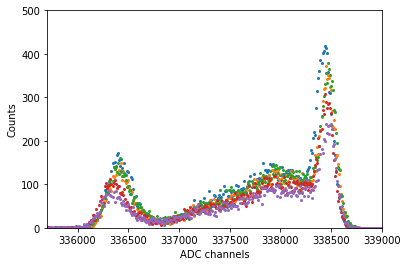

y =  0.11095768002912569 *x +  0.06634636086065349


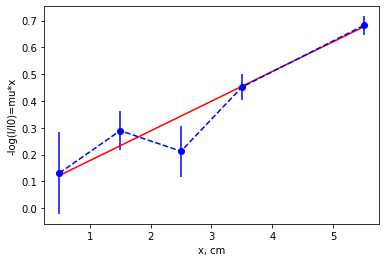

In [4]:
x,y = np.array([]), np.array([])
try:    
    file = open(path + "/" + fileName0)
    for line in file.readlines():
        line = line.replace(',','.')
        b = line.split()
        b[0] = float(b[0])
        b[1] = float(b[1])
        x = np.append(x, b[0])
        y = np.append(y, b[1])
except FileNotFoundError:
    print('Can`t open the file',fileName,'. No such file or directory')
except ValueError:
    print('It`s not a number. Check the data in the file')
except IndexError:
    print('The index is not in the range of elements. Check the data in the file')
        
mask = (x>Xboard1) & (x<Xboard2)
I0 = sum(y[mask])
print('I0 =',I0,'+-',sqrt(I0))

for fileName in listFiles:    
    x,y = np.array([]), np.array([])
    try: 
        file = open(path + "/" + fileName)
        for line in file.readlines():
            line = line.replace(',','.')
            b = line.split()
            b[0] = float(b[0])
            b[1] = float(b[1])
            x = np.append(x, b[0])
            y = np.append(y, b[1])
    except FileNotFoundError:
        print('Can`t open the file',fileName,'. No such file or directory')
    except ValueError:
        print('It`s not a number. Check the data in the file')
    except IndexError:
        print('The index is not in the range of elements. Check the data in the file')

    plt.plot(x, y,'o',markersize=2)
    mask = (x>Xboard1) & (x<Xboard2)
    I = sum(y[mask])
    print('I = ',I,'+-',sqrt(I))
    #print('absorption =',-math.log(I/I0),'+-',-sqrt((sqrt(I)/I)*(sqrt(I)/I)+(sqrt(I0)/I0)*(sqrt(I0)/I0)))
    print('absorption =',-math.log(I/I0),'+-',-(1/math.log(I/I0))*sqrt((sqrt(I)/I)*(sqrt(I)/I)+(sqrt(I0)/I0)*(sqrt(I0)/I0)))
    absorption = np.append(absorption, -math.log(I/I0))
    #errabsorption = np.append(errabsorption, -sqrt((sqrt(I)/I)*(sqrt(I)/I)+(sqrt(I0)/I0)*(sqrt(I0)/I0))) 
    errabsorption = np.append(errabsorption, -(1/math.log(I/I0))*sqrt((sqrt(I)/I)*(sqrt(I)/I)+(sqrt(I0)/I0)*(sqrt(I0)/I0))) 
        
plt.xlabel('ADC channels')
plt.ylabel('Counts')
plt.ylim([0, 500])
plt.xlim([Xleft, Xright])
plt.show()
                           
#plt.plot(lenghtAbs, absorption,'ob--')
plt.errorbar(lenghtAbs, absorption, yerr=errabsorption, fmt='ob--')
p, cov = curve_fit(fitline, lenghtAbs, absorption, sigma=errabsorption)
print('y = ',p[0],'*x + ',p[1])
fit_f = fitline(lenghtAbs, *p)
plt.plot(lenghtAbs, fit_f, 'r')
plt.xlabel('x, cm')
plt.ylabel('-log(I/I0)=mu*x')
plt.savefig(outAbsLaw)
plt.show()                           